In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
from scipy import stats
from viewser.operations import fetch
from viewser import Queryset, Column
import subprocess


In [11]:
from MonthToAnnual import MonthToAnnualRegression

In [3]:
df = Queryset("month_to_annual", "country_month").fetch()

 .    

In [10]:
df.query('country_id == 27')

,,wdi_sh_dyn_mort_fe,wdi_ny_gdp_mktp_kd,wdi_sp_pop_totl,ged_sb_tlag1,ged_sb_tlag2,ged_sb_tlag3,ged_sb_tlag4,ged_sb_tlag5,ged_sb_tlag6,ged_sb_tlag7,...,ged_sb_tlag27,ged_sb_tlag28,ged_sb_tlag29,ged_sb_tlag30,ged_sb_tlag31,ged_sb_tlag32,ged_sb_tlag33,ged_sb_tlag34,ged_sb_tlag35,ged_sb_tlag36
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
21,27,4.062166,19.977053,11.910123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,4.062166,19.977053,11.910123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,27,4.062166,19.977053,11.910123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,27,4.062166,19.977053,11.910123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,27,4.018183,19.975975,11.934330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,27,2.415914,21.553353,12.899300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
849,27,2.415914,21.553353,12.899300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,27,2.415914,21.553353,12.899300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
j = 0
for i in range(1,247,1):
    count = MonthToAnnualRegression.countries_with_missing_data(df,i)
    if count != 852 :
        print(i)
        j=j+1
print('Number of countries with missing data is ',j)

15
27


35
36
44
51
56
57
59
61
63
65
68
71
72
75
83
84
86
88
91
92
95
98
102
103
106
110
111
113
114
115
117
122
123
124
125
126
131
134
137
140
141
144
152
153
163
170
175
176
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
200
201
202
203
204
207
208
209
210
211
212
215
216
217
219
221
224
225
226
227
228
229
230
231
232
233
236
238
239
240
241
242
245
246
Number of countries with missing data is  99


In [ ]:
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

In [ ]:
df = df.query('month_id > 240 & month_id < 505 & month_id%12 == 0 & country_id<184')

In [ ]:
data1 = MonthToAnnualRegression(df)

In [ ]:
data1.data

wdi_sh_dyn_mort_fe  wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  \
month_id country_id                                                            
252      1                     3.732896           21.779484        13.539826   
         2                     3.349904           21.795169        13.079454   
         3                     3.277145           23.309243        14.102345   
         4                     2.990720            0.000000        17.011230   
         5                     3.005683           20.098032        12.122740   
...                                 ...                 ...              ...   
504      179                   3.696351           23.901682        16.113027   
         180                   2.890372           21.084046        13.469990   
         181                   2.995732           17.685140         9.324115   
         182                   3.104587           20.526323        12.673379   
         183                   1.740466           28.150049        17.459552   

                     ged_sb_tlag1  ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  \
month_id country_id                                                           
252      1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
504      179                  0.0           0.0           0.0           0.0   
         180                  0.0           0.0           0.0           0.0   
         181                  0.0           0.0           0.0           0.0   
         182                  0.0           0.0           0.0           0.0   
         183                  0.0           0.0           0.0           0.0   

                     ged_sb_tlag5  ged_sb_tlag6  ged_sb_tlag7  ...  \
month_id country_id                                            ...   
252      1                    0.0           0.0           0.0  ...   
         2                    0.0           0.0           0.0  ...   
         3                    0.0           0.0           0.0  ...   
         4                    0.0           0.0           0.0  ...   
         5                    0.0           0.0           0.0  ...   
...                           ...           ...           ...  ...   
504      179                  0.0           0.0           0.0  ...   
         180                  0.0           0.0           0.0  ...   
         181                  0.0           0.0           0.0  ...   
         182                  0.0           0.0           0.0  ...   
         183                  0.0           0.0           0.0  ...   

                     ged_sb_tlag28  ged_sb_tlag29  ged_sb_tlag30  \
month_id country_id                                                
252      1                     0.0            0.0            0.0   
         2                     0.0            0.0            0.0   
         3                     0.0            0.0            0.0   
         4                     0.0            0.0            0.0   
         5                     0.0            0.0            0.0   
...                            ...            ...            ...   
504      179                   0.0            0.0            0.0   
         180                   0.0            0.0            0.0   
         181                   0.0            0.0            0.0   
         182                   0.0            0.0            0.0   
         183                   0.0            0.0            0.0   

                     ged_sb_tlag31  ged_sb_tlag32  ged_sb_tlag33  \
month_id country_id                                                
252      1          

In [ ]:
independent_variable = ['wdi_ny_gdp_mktp_kd','wdi_sp_pop_totl','ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36','country_id']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data1.ols_regression(independent_variable,dependent_variable,'Fixed Effect')

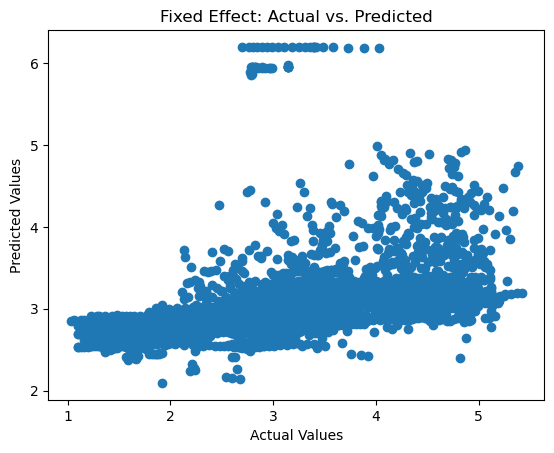

In [ ]:
data1.plot_regression(independent_variable,dependent_variable,'Fixed Effect')

In [ ]:
data1.results

{'Fixed Effect': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.233
 Model:                            OLS   Adj. R-squared:                  0.225
 Method:                 Least Squares   F-statistic:                     28.62
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.79e-180
 Time:                        15:11:50   Log-Likelihood:                -4975.0
 No. Observations:                3705   AIC:                         1.003e+04
 Df Residuals:                    3665   BIC:                         1.028e+04
 Df Model:                          39                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

In [ ]:
independent_variable = ['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18',
                        'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data1.ols_regression(independent_variable, dependent_variable,'No effect')

In [ ]:
data1.results

{'Fixed Effect': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.233
 Model:                            OLS   Adj. R-squared:                  0.225
 Method:                 Least Squares   F-statistic:                     28.62
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.79e-180
 Time:                        15:11:50   Log-Likelihood:                -4975.0
 No. Observations:                3705   AIC:                         1.003e+04
 Df Residuals:                    3665   BIC:                         1.028e+04
 Df Model:                          39                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

In [ ]:
print(data1.get_regression_matrix('Fixed Effect'))

                            OLS Regression Results                            
Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.79e-180
Time:                        15:11:50   Log-Likelihood:                -4975.0
No. Observations:                3705   AIC:                         1.003e+04
Df Residuals:                    3665   BIC:                         1.028e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.5971      0

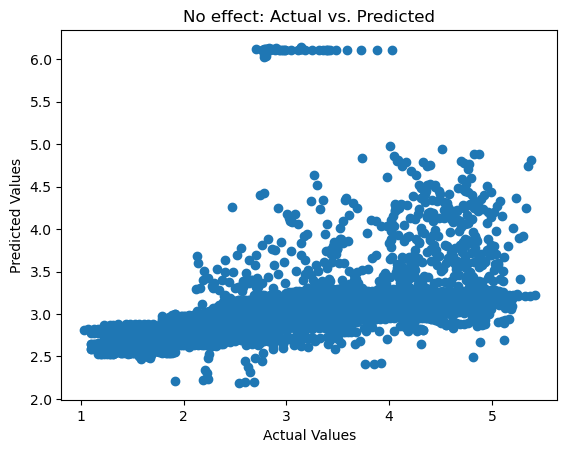

In [ ]:
model_name = 'No effect'
data1.plot_regression(independent_variable,dependent_variable,model_name)

In [ ]:
data1.models

{'Fixed Effect': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x15f497ca0>,
 'No effect': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x15f497df0>}

In [ ]:
MonthToAnnualRegression.f_test(data1.models['Fixed Effect'], data1.models['No effect'])

(40.70424390082575, 1.9921400715601425e-10, 1.0)


month_id  country_id
252       20            3.085019
264       20            3.087994
276       20            3.083903
288       20            3.072751
300       20            3.074139
312       20            3.058784
324       20            3.064503
336       20            3.057452
348       20            3.056780
360       20            3.066038
372       20            3.067239
384       20            3.066874
396       20            3.069033
408       20            3.066772
420       20            3.058434
432       20            3.051147
444       20            3.047118
456       20            3.042209
468       20            3.037366
480       20            3.037079
492       20            3.056538
504       20            3.051302
dtype: float64


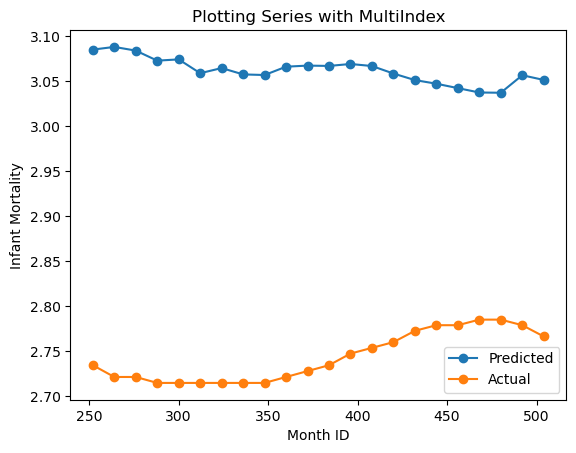

In [ ]:
data1.plot_time_series_regression(independent_variable, dependent_variable, 'No effect', country_id=20)